<a href="https://colab.research.google.com/github/nandinisitlani2/python-forBI/blob/main/MetaPhrophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet"

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet


In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [6]:
df=pd.read_csv("Udemy_wikipedia_visits.csv")

<Axes: >

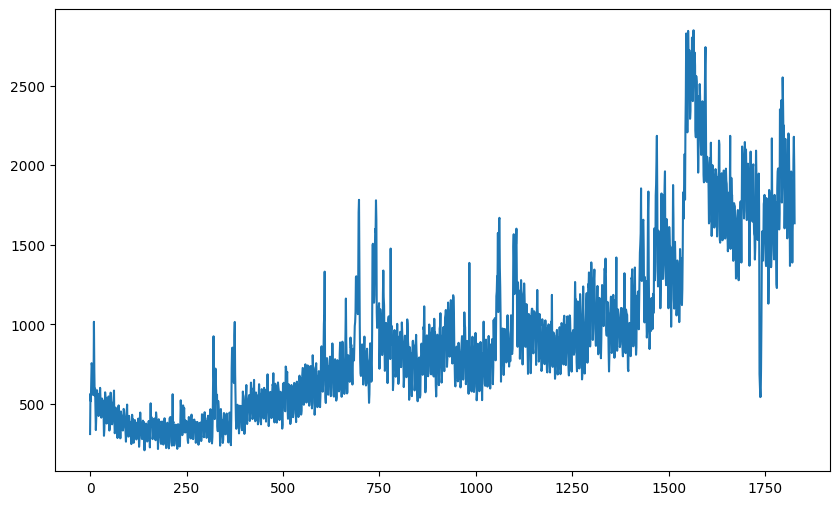

In [7]:
df.Udemy.plot(figsize=(10,6))

## data prep

In [10]:
df.Date=pd.to_datetime(df.Date,
                       format="%m/%d/%Y")

In [14]:
df=df.rename(columns={"Date":"ds",
                      "Udemy":"y"})

In [19]:
easter_dates=df[df.Easter==1].ds
easter=pd.DataFrame({"holiday":"easter",
              "ds":easter_dates,
              "lower_window":-5,
              "upper_window":2})

In [17]:
easter_dates

86     2016-03-27
471    2017-04-16
821    2018-04-01
1206   2019-04-21
1563   2020-04-12
Name: ds, dtype: datetime64[ns]

In [21]:
black_friday_dates=df[df.Easter==1].ds
black_friday=pd.DataFrame({"holiday":"black_friday",
              "ds":black_friday_dates,
              "lower_window":-7,
              "upper_window":5})

In [22]:
holidays=pd.concat([easter,black_friday])

In [23]:
holidays

,holiday,ds,lower_window,upper_window
86,easter,2016-03-27,-5,2
471,easter,2017-04-16,-5,2
821,easter,2018-04-01,-5,2
1206,easter,2019-04-21,-5,2
1563,easter,2020-04-12,-5,2
86,black_friday,2016-03-27,-7,5
471,black_friday,2017-04-16,-7,5
821,black_friday,2018-04-01,-7,5
1206,black_friday,2019-04-21,-7,5
1563,black_friday,2020-04-12,-7,5


In [29]:
df=df.drop(columns=["Easter","Black Friday"])

In [34]:
test_days=31
training=df.iloc[:-test_days,:]
test=df.iloc[-test_days:,:]

In [47]:
m=Prophet(growth="linear",
          yearly_seasonality=True,
          weekly_seasonality=True,
          daily_seasonality=False,
          holidays=holidays,
          seasonality_mode="additive",
          seasonality_prior_scale=10,
          holidays_prior_scale=10,
          changepoint_prior_scale=0.05

          )

In [48]:
m.add_regressor("Christmas")
m.fit(training)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlunws2s/tj5px6cq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlunws2s/os73wnuw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=659', 'data', 'file=/tmp/tmpqlunws2s/tj5px6cq.json', 'init=/tmp/tmpqlunws2s/os73wnuw.json', 'output', 'file=/tmp/tmpqlunws2s/prophet_model4mt564gu/prophet_model-20230801011858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Christmas,additive,0.0,-239.06743,-239.06743,-239.06743


## Forecasting

In [50]:

future=m.make_future_dataframe(periods=test_days,
                        freq="D")

In [51]:
future=pd.concat([future,df.iloc[:,2:]],
                 axis=1)

In [52]:
future

,ds,Christmas
0,2016-01-01,0
1,2016-01-02,0
2,2016-01-03,0
3,2016-01-04,0
4,2016-01-05,0
...,...,...
1822,2020-12-27,0
1823,2020-12-28,0
1824,2020-12-29,0
1825,2020-12-30,0


In [53]:
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,318.630546,167.782404,674.116889,318.630546,318.630546,0.0,0.0,0.0,114.456205,...,-20.427690,-20.427690,-20.427690,134.883895,134.883895,134.883895,0.0,0.0,0.0,433.086751
1,2016-01-02,318.969047,51.467545,546.279306,318.969047,318.969047,0.0,0.0,0.0,-20.200770,...,-183.049139,-183.049139,-183.049139,162.848369,162.848369,162.848369,0.0,0.0,0.0,298.768277
2,2016-01-03,319.307548,111.868994,627.082291,319.307548,319.307548,0.0,0.0,0.0,47.679179,...,-141.594487,-141.594487,-141.594487,189.273666,189.273666,189.273666,0.0,0.0,0.0,366.986727
3,2016-01-04,319.646049,376.121390,891.004933,319.646049,319.646049,0.0,0.0,0.0,294.111590,...,80.405294,80.405294,80.405294,213.706296,213.706296,213.706296,0.0,0.0,0.0,613.757640
4,2016-01-05,319.984551,399.926624,922.393446,319.984551,319.984551,0.0,0.0,0.0,340.389913,...,104.652196,104.652196,104.652196,235.737717,235.737717,235.737717,0.0,0.0,0.0,660.374464


In [55]:
holiday="easter"
forecast[forecast[holiday].abs()>0][["ds",holiday]]

,ds,easter
81,2016-03-22,-8.388856
82,2016-03-23,-14.946266
83,2016-03-24,7.293245
84,2016-03-25,16.654181
85,2016-03-26,42.612473
86,2016-03-27,47.511590
87,2016-03-28,43.214328
88,2016-03-29,15.762729
466,2017-04-11,-8.388856
467,2017-04-12,-14.946266


In [56]:
## accuracy assesment

In [62]:
predictions=forecast.yhat[-31:]

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [64]:
mean_absolute_error(test.y,predictions)
rmse=np.sqrt(mean_squared_error(test.y,predictions))

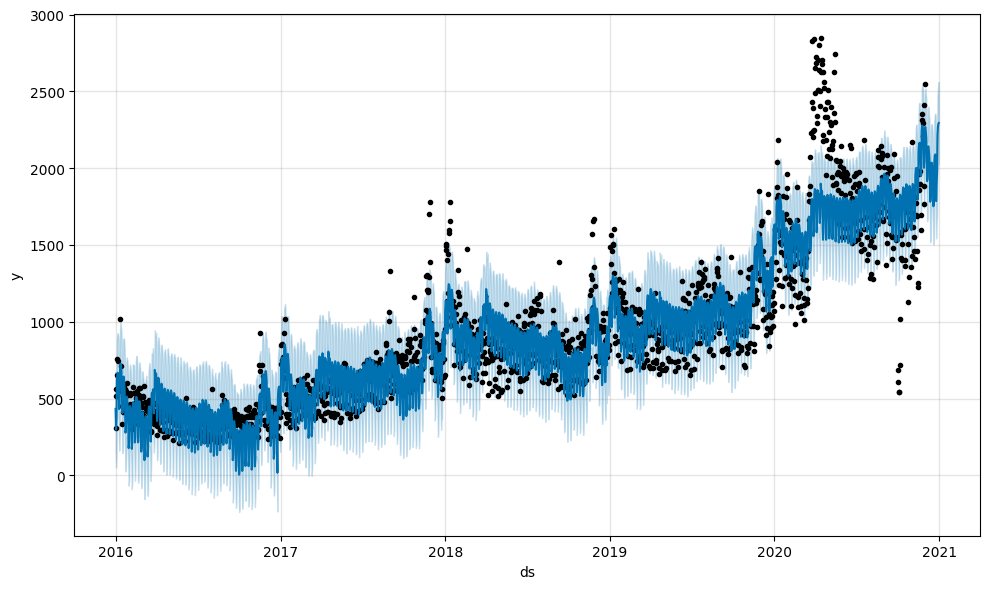

In [65]:
m.plot(forecast);

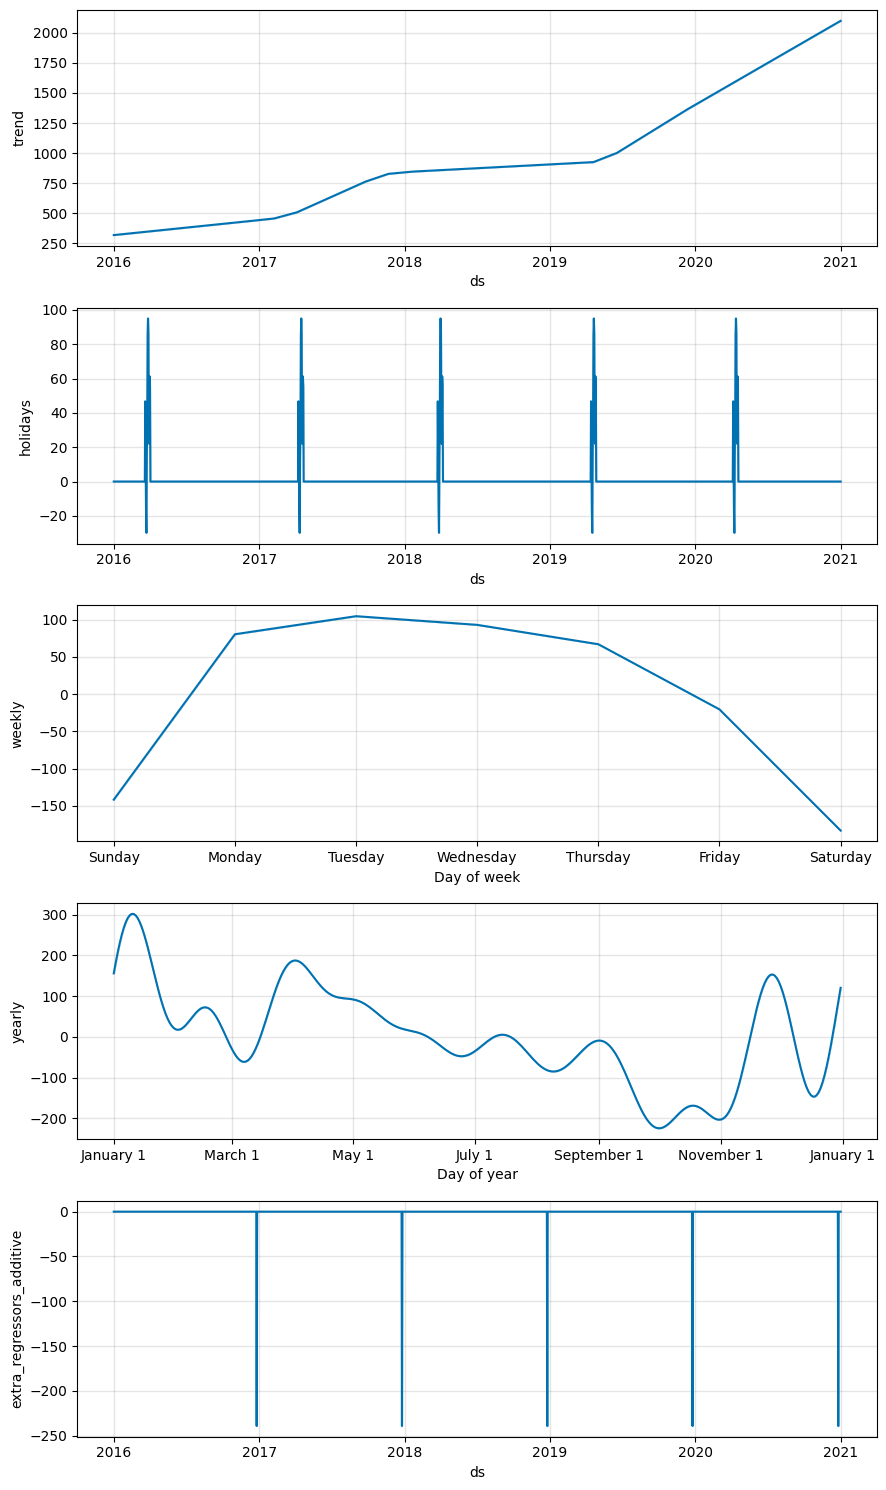

In [66]:
m.plot_components(forecast);

##Cross validation

In [68]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(m,
                 horizon="31 days",
                 initial="1450 days",
                 parallel="processes")

INFO:prophet:Making 21 forecasts with cutoffs between 2019-12-25 00:00:00 and 2020-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab36ecc34c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlunws2s/m1pe3wzs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlunws2s/5qwvrfj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlunws2s/5ew99jyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51229', 'data', 'file=/tmp/tmpqlunws2s/m1pe3wzs.json', 'init=/tmp/tmpqlunws2s/5ew99jyp.json', 'output', 'file=/tmp/tmpqlunws2s/prophet_model61aodqe3/prophet_model-20230801013351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlunws2s/x21lsl2s.json
DE

In [69]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-26,1256.388162,1118.278844,1400.278046,1165,2019-12-25
1,2019-12-27,1207.340826,1064.388420,1343.941576,1111,2019-12-25
2,2019-12-28,1086.147008,952.598010,1231.917729,1038,2019-12-25
3,2019-12-29,1154.767109,1016.582126,1296.299248,971,2019-12-25
4,2019-12-30,1371.669298,1241.228691,1519.675793,1192,2019-12-25


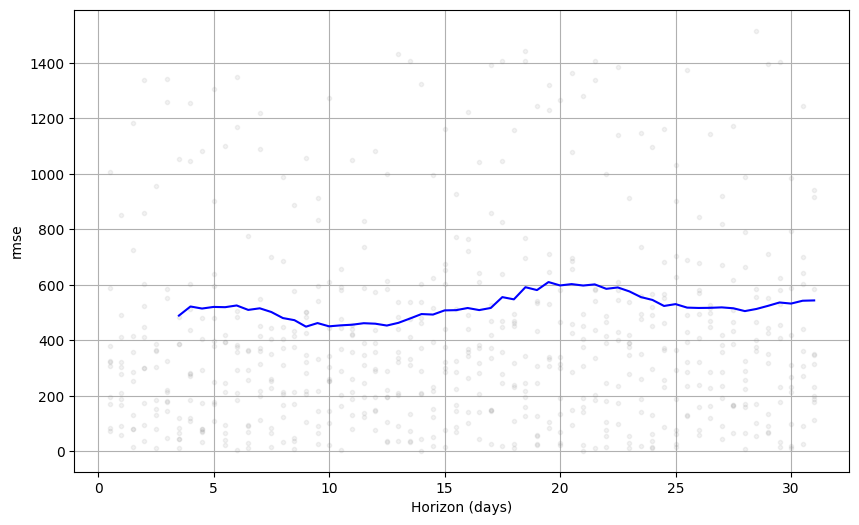

In [71]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,
                             metric="rmse");